# Lecture 10.2 Unsupervised Learning

In [1]:
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## 1. Clustering Models

We will work on two clustering models: K-Means, and DBSCAN. Note that clustering models solve unsupervised learning problems, and there is no observed outcome variables. Therefore, there is no "overfitting" issue, and we do not need to split our data.

### 1.1 KMeans
As mentioned in class, K-Means works well when data has a round or oval shape. In below, we would first generate data with round shape, then use K-Means for clustering.

For data generation, use: sklearn.datasets.make_blobs. 

For K-Means clustering, use syntax:
**<center>sklearn.cluster.KMeans()</center>**
- n_clusters: the number of clusters to use
- n_init: the number of k-means to run with different initial points. Default = 10
- random_state: the generation of initial points



Similar to supervised learning methods, we use .fit to train our model, use .predict for prediction. Instead of predicting a "y", we are predicting a cluster label. We can even use .score to get performance measure. However, the performance measure is irrelevant to "how well we predict", but about "how close the points are". Specifically, the value is -SSE (negative value).

We can also use .cluster_centers_ to get the centroids. 

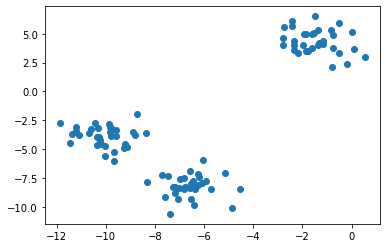

In [2]:
# S1.1: Data Generation
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=1)

# S1.2: Plot Data
plt.scatter(X[:,0], X[:,1])

In [8]:
# S2: K-Means Clustering
from sklearn.cluster import KMeans

kmeans3 =  KMeans(n_clusters = 3, random_state = 0)
kmeans3.fit(X, y)

# Predict the cluster labels

cls_predict = kmeans3.predict(X)

print("Predicted Labels:", kmeans3.predict(X))
print("Performance Score:", kmeans3.score(X, y)) # provide negative value, -SSE
print("Cluster Centers: \n", kmeans3.cluster_centers_)  

Predicted Labels: [1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]
Performance Score: -156.2828925117
Cluster Centers: 
 [[-10.04935243  -3.85954095]
 [ -1.4710815    4.33721882]
 [ -6.58196786  -8.17239339]]


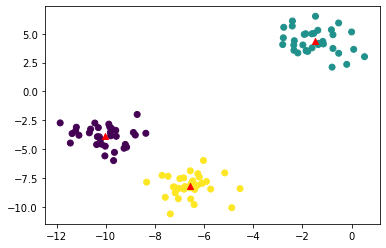

In [12]:
# S3: Visualize our results:
# plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[:, 0], X[:, 1], c=cls_predict)
# Visualizing centroids
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:, 1],  marker='^', c = 'r')

### 1.2 DBSCAN
DBSCAN works well for arbitrary shape. Thus, we will create a dataset with moon shape and check its performance.

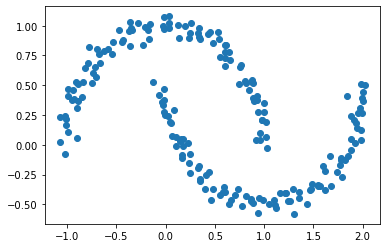

In [13]:
# Data Generation
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

DBSCAN is realized using syntax:

**<center>sklearn.cluster.DBSCAN</center>**
- eps: the epsilon size. default is 0.5
- min_samples: the MinPts. default is 5

Instead of using .fit to train our model, we use **.fit_predict(X_INPUT)** to train and predict at the same time. The output would be the cluster labels.

#### Choosing eps and min_samples
DBSCAN is sensitive to the choice of parameters. A rule of thumb would be: 
- min_samples = 2* feature number;
- eps: adjusted based on number of clusters obtained. 
    - If too many clusters => increase eps, 
    - If too few clusters => decrease eps.

#### Rescaling Data Recap (I)
One key point for DBSCAN is rescaling. As density is defined on a circle around a point, it is important to standardize the data, so that all variables have zero mean and unit variance (and in the same scale). Recall that standardization is realized using syntax:

**<center>sklearn.preprocessing.StandardScaler</center>**

Similar to all models, use .fit to train the model. Then use **.transform()** to get the scaled output.

In [18]:
# S1: Preprocessing
from sklearn.preprocessing import StandardScaler # MinMaxScaler
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X) # fit_transform feasible (technically) but not recommended, 
                                # particularly in supervised learning

print(np.mean(X), np.mean(X_scaled))
print(np.var(X),  np.var(X_scaled))
# X_scaled
# X

0.37434879176820846 -7.771561172376097e-18
0.5166735644043563 1.0


In [25]:
# S2: Apply DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)

clusters = dbscan.fit_predict(X_scaled)

print(clusters)
# -1 means outlier, 7 clusters here
# np.max(clusters)

[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]


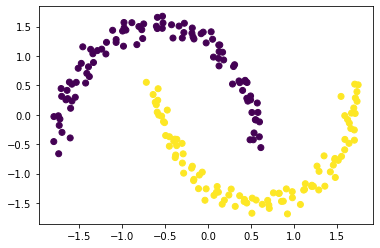

In [26]:
# S3: plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)

## 2. PCA
PCA is a dimension reduction tool. It transfers original $X$ to a set of $X_{new}$. Based on our specific needs, only a subset of $X_{new}$ would be kept, and the dimension would be reduced accordingly.

PCA can be realized using syntax:
**<center>sklearn.decomposition.PCA</center>**

- **n_components:** can be integer or float. 
    - If integer, then n_components is the number of components to keep; 
    - If float, then n_components is the percentage of variance explained.
- copy: whether to keep the original dataset. Default is True (recommended setting). If False, then the new variables will overwrite the original variable.
- whiten: bool. Default is False. If True, then new variables have variance = 1.
- random_state: technical reasons

We can use **.fit_transform(X)** to both train the model, and produce the new variables (with dimension reduction) directly. To transfer the new data back to the original data, use **.inverse_transform(Xnew)**.

### PCA Attributes
After applying .fit_transform(), we can obtain the corresponding attributes:
- **.components_:** It shows how the new variables are generated. Recall that the new variable is a linear transfer or the original variables, the output of .components_ is the coefficients of the linear transfer
- **.explained_variance_ratio_:** It shows the percentage of variance explained by each new variable.


### Practice
Suppose we have a dataset with three dimensions. The data points follow a ring-shape (on the x, y plane), but a bit tilted (on the z axis). We would like to reduce the dimension to 2 using PCA.
- After the transfer, what is the proportion of variance in the original dataset included?
- Suppose I want to keep more than 95% of the information, is the transfer proper?
- Can you write down the relationship between the new Xs and the original Xs?

In [2]:
# S0 Data Generation
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

## Prep for 3D data generation
X = np.empty((m, 3))

## The "Ring"
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2

## The "Tilt"
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

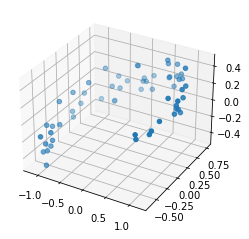

In [3]:
# Visualize the data
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()

In [4]:
# S1: Apply PCA
from sklearn.decomposition import PCA
pca2 = PCA(n_components = 2, random_state = 0, whiten = True)
X2D = pca2.fit_transform(X)
print("Before transfer, the dimension is:", X.shape[1], "\n",
      "After transfer, the dimension is:", X2D.shape[1])

Before transfer, the dimension is: 3 
 After transfer, the dimension is: 2


In [6]:
# X2D

In [7]:
# S2: Finding the "explained variance", or the information kept after transfer
pca2.explained_variance_ratio_ # 2 values, because 2 components. [var for PC1, var for PC2]

array([0.84248607, 0.14631839])

In [8]:
# suppose keep 95% total info, w/o training model, tell me how many components to keep?
# Answer: 2
# first component: 84% < 95%, need more than 1 component
np.sum(pca2.explained_variance_ratio_)
# first 2 components: 98.9>95 => keep 2 components

0.988804464429311

In [9]:
# S3: Finding the transfer: how to get PCs
pca2.components_ # 2 rows, because 2PCs kept; 3 columns, because initial X has dimension 3

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [ ]:
# Suppose the original variables are X1, X2, X3, correspondingly
## Then: 
## X1_new = -0.936X1 -0.299X2 - 0.185X3
## X2_new = 0.340X1 - -0.901X2 - 0.268X3

## Practice: Facial Recognition

In this practice, we will do facial recognition using the tools we've learned. Let's first meet the data.
### The Wild Face Dataset
The Wild Face Dataset is a collection of pictures of famous people over the internet. It has altogether 5749 people and 13233 pictures. Each picture has 5828 features, and each feature is a real number between 0 and 255. The dataset can be obtained through:
**<center>sklearn.datasets.fetch_lfw_people</center>**
- min_faces_per_person: minimum number of faces required for a person (class label) to be included)
- resize: float, the factor used to resize the image (closer to 1 => more features)

In [10]:
# Load the Data
## For the first time, the code may take several minutes to run
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [11]:
# Check features
print("keys:", people.keys())
print("target shape:", people.target.shape)
print("data shape:", people.data.shape)
print("image shape:", people.images.shape) # cutting picture into tiny squares, 87 rows, 65 columns
print('target_names shape:', people.target_names.shape)
# 3023 pictures, each picture described by 87*65=5655 features. 62 unique people (classes)
# complicated multi classification problem

keys: dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
target shape: (3023,)
data shape: (3023, 5655)
image shape: (3023, 87, 65)
target_names shape: (62,)


In [12]:
87*65

5655

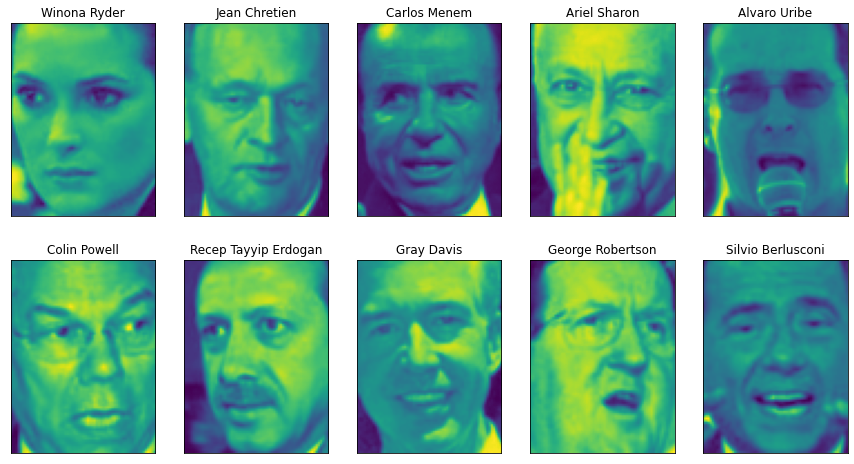

In [13]:
# Check a couple of pictures

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
    
    
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap='viridis')
    ax.set_title(people.target_names[target])

In [15]:
counts=np.bincount(people.target)
counts

array([ 39,  35,  21,  36,  20,  77,  42,  24,  29,  21, 236,  31, 121,
        22, 530, 109,  44,  26,  30,  22,  39,  71,  20,  28,  52,  55,
        21,  42,  21,  24,  20,  53,  31,  23,  28,  60,  32,  41,  22,
        41,  48,  29,  33,  20,  22,  37,  20,  22,  30,  27,  32,  26,
        23,  52,  33,  23,  25,  33, 144,  32,  49,  24], dtype=int64)

In [16]:
# Data for Analysis
X = people.data
y = people.target

from sklearn.model_selection import train_test_split

# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
#stratify is guarantee y_train proportions consistent with y proportions

### Nearest Neighbor Classification with PCA
Using KNN as an example, let's see how PCA would influence the classifiers' performance. 

For simplification, we do not seek the best k, instead, let k=1. We will start by a classifier without PCA.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn is:", knn.score(X_test, y_test))

Test set score of 1-nn is: 0.3253968253968254


### Scaling Data (II)

We may consider scaling the data to seek performance improvement. Then the questions would be: which scaler to use? Standard or minmax? Does my data contain outliers? Is it meaningful to keep a certain range of my transferred variable?

For minmax scaler, use:

**<center>sklearn.preprocessing.MinMaxScaler</center>**

Use .fit to train and use .transform to get the scaled the data.

In [18]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1)) # Scale to range 0 to 1, which is default
## equivalent to MinMaxScaler()

# Train our scaler
minmax.fit(X_train) # obtaining min and max for X_train

# Get scaled variables
X_train_scaled = minmax.transform(X_train) # use same scaler (i.e., min and max from X_train) to scale
X_test_scaled = minmax.transform(X_test)
# X_train_scaled

# Below is incorrect: here scaling separately
# minmax.fit_transform(X_train), minmax.fit_transform(X_test) # this is wrong

array([[0.10367455, 0.1061599 , 0.14454666, ..., 0.11111112, 0.09019608,
        0.08366014],
       [0.02755906, 0.02228047, 0.02102497, ..., 0.8287582 , 0.84444445,
        0.86535954],
       [0.16929133, 0.14023592, 0.15374507, ..., 0.9594772 , 0.96209157,
        0.9555556 ],
       ...,
       [0.20866142, 0.22280471, 0.23784494, ..., 0.27320263, 0.28366014,
        0.3254902 ],
       [0.08792651, 0.0825688 , 0.0630749 , ..., 0.7594772 , 0.47450984,
        0.23790851],
       [0.26377952, 0.26867628, 0.28777924, ..., 0.59084976, 0.5921569 ,
        0.5921569 ]], dtype=float32)

In [19]:
# We can also do the scaling manually. The result might differ slightly
X_manual_train = X_train/255 # assuming X_train|min = 0, X_train|max = 255
# For computer vision only, where all vars will be [0,255]
# X_manual_train

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
print("Test set score of 1-nn is:", knn.score(X_test_scaled, y_test))

Test set score of 1-nn is: 0.33994708994708994


### PCA
Now let's try PCA. We would like to reduce the dimension to 100. Given the training sample size be around 2000, we consider this dimension proper. Given the 100 new variables, what would be the performance of the knn classifier?

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100,  whiten=True, random_state=0) # consider as scaling to var = 1

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)

X_train_pca.shape: (2267, 100)


In [22]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: ", knn.score(X_test_pca, y_test))

Test set accuracy:  0.45105820105820105


In [23]:
np.sum(pca.explained_variance_ratio_) # performance improves with less info
# Dimension reduces by 5400, but keeps around 90% of info.

0.89834344

In [24]:
pca.components_ # coefficients to get PCs, equivalent to the grayscale of each tiny grid of a picture
# PC1: [top left cell: color = -0.0047, ...] (coloring a picture grid by grid, based on coef.)

array([[-0.00476362, -0.00513477, -0.00544773, ..., -0.00543634,
        -0.00532048, -0.00492963],
       [ 0.01327512,  0.01306853,  0.01297683, ..., -0.02262182,
        -0.0218147 , -0.02068427],
       [ 0.02930911,  0.02965284,  0.03030208, ...,  0.01828197,
         0.01709287,  0.01590564],
       ...,
       [-0.0202466 , -0.02206656, -0.02153207, ..., -0.02762524,
        -0.02206795, -0.01464765],
       [ 0.03449278,  0.03083556,  0.02465398, ..., -0.00295673,
        -0.00553295, -0.00452549],
       [-0.01149416, -0.00711757, -0.00115019, ..., -0.01889228,
        -0.022218  , -0.02683536]], dtype=float32)

### Visualizing Components

The transfer provides a improvement in the model performance. Besides, we can visualize our new variables (now these new variables are called "eigenfaces"). Now try the cell below: 

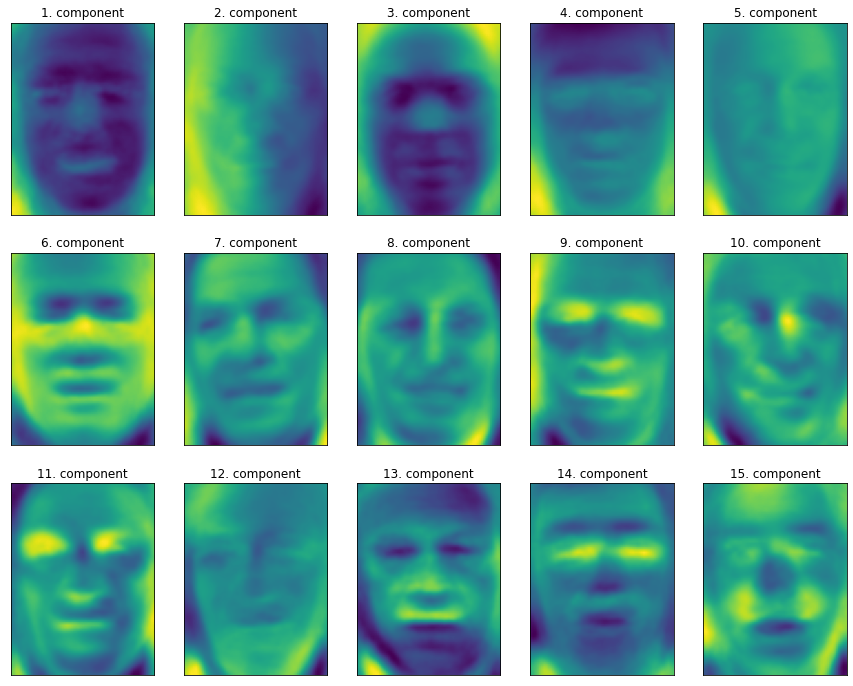

In [25]:
image_shape = people.images[0].shape

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

As you can image, PCA can be applied with different supervised learning methods. For this specific problem, PCA can be combined with other methods such as Naive Bayes, SVM, Random Forests, etc. All we need to do is to change the cells with KNN to the specific models.